### Importações necessárias

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from PIL import Image

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import os

if not os.path.exists("mineração_texto"):
    os.mkdir("mineração_texto")


In [29]:
df_relatos = pd.read_csv('C:\\Users\\carlo\\Downloads\\base_tratada(2019-2023).csv')


### Pré-porcessamento e limpeza dos relatos

In [30]:
total_palavras = df_relatos['relato'].apply(lambda x: len(x.split())).sum()

print(f'Total de palavras no DataFrame: {total_palavras}')

Total de palavras no DataFrame: 6556784


In [31]:
df_relatos.shape

(47607, 21)

In [32]:
relatos=df_relatos[['relato']]

In [33]:
pd.set_option('display.max_colwidth', None)

In [34]:
relatos.head(5)

,relato
0,"nacional marisangela ferreira pacheco uipp - terra firme comunicar citados trabalhando esposa funcinário trabalhar , chamada nezia chaves gomes fazendo escândalo frente loja relatora trabalha . mulher dizia : `` vou pegar cortar toda cara , desa puta , vou deixar arreada chão furar todinha '' ( textuais ) . vítima diz tempo nezia espalha relatora caso marido , levy baia , relatora trabalha . sente constrangida fofocas ameaças , tempo pede levy convencer esposa dois relação , rapaz faz nada , fica calado . sabe suspeita reside marambaia , passagem simão jatene , número 7 , água cristal trabalha passagem francisco xavier , final jabatiteua , padaria fica esquina , próximo vileta ."
1,"relatora qualificada , seccional urbana polícia , declarar 26/01/2019 , 18:00 , enquanto visitava tia ( nacional “ geraldina brito sales ) , hospital saúde mulher , ap 810 , localizada tv . humaita , 1558 – marco , 66085-220 , agredida fisicamente tapas , arranhões , puxões socos região rosto , tórax membros superiores nacional “ simone carla sales duarte ” , prima . contenda começou devido problemas familiares relatora revidou procurou afastar ímpeto agressivo nacional ; satisfeita , nacional agressora proferiu impropérios , dentro : “ louca ” , “ pilantra , safada ” , “ filha puta ” etc . momentos antes realizou atos contra outros parentes dentro deste hospital . local momento agressões presentes enfermeiras plantão , estando disponíveis testemunhas . findo ocorrência , relatora dirigiu-se seccional urbana , pois pretende tomar devidas providências legais . registra-se direito ."
2,", especializada denunciar irmão ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. comunica irmão agressivo . , 02/11/2019 13:00 relatora limpando residência , ouviu populares gritando ailton ia matar marido . relatora correu presenciou ailton faca tentando acertar marido relatora , dentro veículo . relatora ailton ia matar marido , relatora puxou ailton braço ailton tentou furar relatora faca . filha relatora correu conseguiu segurar ailton , ofendeu relatora : “ vagabunda , prostituta , ladrona ’ . relatora afirma ailton alcoolizado . oferecido abrigo relatora interesse , oferecido medidas protetivas relatora requererá seguintes : aproximação ofendida , familiares testemunhas , limite mínimo distância agressor ; contato ofendida , familiares testemunhas qualquer comunicação . deseja representar criminalmente contra ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. apresentou filha testemunha vania gleyce ribeiro tavares . registra-se/////////"
3,"relator qualificado , qualidade policial militar , apresenta nessa delegacia especializada nacional david melo mamede , solteiro , 23 , nascido 07/12/1996 , natural belém/pa , filho maria iraci oliveira melo antônio jarbas gonçalves mamede , ocupação , beco jorge , nº 36 , pass . nova rua iracema , bairro : marambaia , belém/pa , virtude ter agredido fisicamente ameaçado companheira vania sousa farias , solteira , 31 , nascida 26/08/1988 , natural augusto correa/pa , filha rosilene sousa farias antônio ferreira farias , autônoma , rua airton senna , nº 01 , próximo av . brasil , bairro : 40 horas ( coqueiro ) , ananindeua/pa ; ( 06/11/2019 ) , 13:00 horas , serviço ronda bairro marambaia , acionado via ciop informação havia casal discutindo residência ; ato contínuo dirigiu endereço informado , encontrou vítima , relatou desde ontem casal discutindo chegou registrar ocorrência manhã ( 06/11/2019 ) novamente ameaçado morte agredido fisicamente ; diante tal situação , todos conduzidos apresentados autoridade policial plantonista , determinou lavratura auto prisão flagrante delito crime lesão corporal ameaça - violência doméstica . registra-se providências cabíveis///////////////"
4,"relatora qualificada epígrafe seccional comunicar vítima ameças ex companheiro , dheison rosário souza , ( domiciliado pa140 , rua santa lu

* Limpeza e remoção de palvras inadequadas

In [11]:
stop_words = set(stopwords.words("portuguese"))
stop_words.update([ 'aai','abaetetuba', 'abaixa', 'abaixada', 'abaixado', 'abaixar', 
    'abaixar som', 'abaixar',' volume', 'abaixasse', 'abaixasse','som', 'abaixo', 
    'abaixo','assinado', 'abaixo','elencadas','informacoes', 'olho', 
    'proibicao', 'proibição', 'abaixou', 'pegar', 'vidro', 'relatora', 'policial', 'militar', 
    'jurunas', 'silva', 'vtr', 'ciop', 'santos', 'bairro', 'fato', 'via', 'havia', 'guarnicao',
    'relator', 'sido', 'policia', 'sgt', 'rua', 'nacional', 'seccional', 'icoaraci', 'urbana', 
    'local', 'fato', 'silva', 'carlos', 'comunicar', 'bairro', 'sacramenta', 'rua', 'uipp','terra',
    'firme','qualificada', 'marambaia', 'passagem', 'momento', 'relatante', 'cpf', 
    'vou', 'textuais', 'vai', 'maria', 'vem', 'sra', 'depoente', 'relata', 'jose', 'apos', 
    'nacional', 'local', 'celular', 'iria', 'relator', 'declarante', 'declarado', 'policiais', 
    'guarnição', 'souza', 'antonio', 'paulo', 'santos', 'vou', 'textuais', 'qualificada', 
    'comparece', 'ana', 'joao', 'maria', 'jose', 'carlos', 'paulo', 'marcos', 'luiz', 'claudia', 
    'ana', 'maria', 'julia', 'isabella', 'sofia', 'alice', 'laura', 'manuela', 'helena', 'luiza', 
    'valentina', 'giovanna', 'beatriz', 'mariana', 'leticia', 'camila', 'emily', 'yasmin', 'clara', 
    'ana clara', 'ana beatriz', 'relator', 'delegado', 'delegada', 'testemunha', 'vítima', 'acusado', 
    'acusada', 'suspeito', 'suspeita', 'criminoso', 'criminosa', 'infrator', 'infratora', 'policial', 
    'agente', 'perito', 'perita', 'detido', 'detida', 'preso', 'presa', 'queixoso', 'queixosa', 
    'comunicar', 'fica', 'fim', 'ato', 'desde', 'pois', 'abadessa','belem','contatos','mora','aqui','casa','ver',
    'citados','usar', 'ameaças', 'mim','mensagens','mensagem','whatsapp', 'medidas','deseja','belmpa',
    'nascido', 'ter','comunicante','dizendo', 'comunica','aps','comunica delegacia','declara','sao', 'comunicante',
    'frente','bras', 'sao bras', 'cima', 'informou', 'costa', 'aludido', 'guama', 'comunica', 'tendo', 'pcpa', 
    'registrase' ,'devidas', 'horas', 'telefone', 'refere', 'comunicacao', 'informar', 'aps', 'ter','veiculo', 'comunicante', 
    'motorista', 'eduardo', 'placa', 'cor', 'moto', 'frente', 'thiago', 'veculo', 'passou', 'motocicleta', 'ficou', 'uber', 
    'respondeu', 'aplicativo', 'tendo', 'aparelho', 'belmpa', 'quanto', 'pra', 'fazer', 'seguinte', 'delegacia','comunica', 
    'mencionados', 'gabriel', 'renato', 'chegou', 'manoel', 'belempa', 'fdata', 'fdata nascimento', 'mencionados', 
    'delegacia', 'atravs' ])

stop_words = list(stop_words)

def limpar_texto(texto):
    texto = re.sub(r'\(\d{2}\)\s?\d{4,5}-\d{4}', '', texto)
    texto = re.sub(r'\d{5}-\d{3}', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Remover stopwords
    tokens = word_tokenize(texto.lower())
    texto = ' '.join([word for word in tokens if word not in stop_words])
    
    return texto

relatos['relato'] = relatos['relato'].apply(limpar_texto)

C:\Users\carlo\AppData\Local\Temp\ipykernel_16392\1877772279.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos['relato'] = relatos['relato'].apply(limpar_texto)


In [12]:
relatos.head(5)

,relato
0,marisangela ferreira pacheco trabalhando esposa funcinrio trabalhar chamada nezia chaves gomes fazendo escndalo loja trabalha mulher dizia cortar toda cara desa puta deixar arreada cho furar todinha vtima diz tempo nezia espalha caso marido levy baia trabalha sente constrangida fofocas ameaas tempo pede levy convencer esposa dois relao rapaz faz nada calado sabe reside simo jatene nmero gua cristal trabalha francisco xavier final jabatiteua padaria esquina prximo vileta
1,polcia declarar enquanto visitava tia geraldina brito sales hospital sade mulher ap localizada tv humaita marco agredida fisicamente tapas arranhes puxes socos regio rosto trax membros superiores simone carla sales duarte prima contenda comeou devido problemas familiares revidou procurou afastar mpeto agressivo satisfeita agressora proferiu improprios dentro louca pilantra safada filha puta etc momentos antes realizou atos contra outros parentes dentro deste hospital agresses presentes enfermeiras planto estando disponveis testemunhas findo ocorrncia dirigiuse pretende tomar providncias legais direito
2,especializada denunciar irmo ailton farias taxista tv humait n pedreira irmo agressivo limpando residncia ouviu populares gritando ailton ia matar marido correu presenciou ailton faca tentando acertar marido dentro ailton ia matar marido puxou ailton brao ailton tentou furar faca filha correu conseguiu segurar ailton ofendeu vagabunda prostituta ladrona afirma ailton alcoolizado oferecido abrigo interesse oferecido protetivas requerer seguintes aproximao ofendida familiares testemunhas limite mnimo distncia agressor contato ofendida familiares testemunhas qualquer comunicao representar criminalmente contra ailton farias taxista tv humait n pedreira apresentou filha vania gleyce ribeiro tavares
3,qualificado qualidade apresenta nessa especializada david melo mamede solteiro natural filho iraci oliveira melo antnio jarbas gonalves mamede ocupao beco jorge n pass nova iracema virtude agredido fisicamente ameaado companheira vania sousa farias solteira nascida natural augusto correapa filha rosilene sousa farias antnio ferreira farias autnoma airton senna n prximo av brasil coqueiro ananindeuapa servio ronda acionado informao casal discutindo residncia contnuo dirigiu endereo informado encontrou vtima relatou ontem casal discutindo registrar ocorrncia manh novamente ameaado morte agredido fisicamente diante tal situao todos conduzidos apresentados autoridade plantonista determinou lavratura auto priso flagrante delito crime leso corporal ameaa violncia domstica providncias cabveis
4,epgrafe vtima ameas ex companheiro dheison rosrio domiciliado pa santa lucia n santa izabelpa hmin recebeu ligao telefnica ex companheiro ameaou atual namorado walter soldado poderia colocar dormir residncia pertencia poderia colocar dormir perto filhos durante ligao dheison ameaou perdeu noo perigoso acabar conviveu ex companheiro durante relacionamento dois filhos ketheleen ramos messias ramos vivem separados quatro nunca aceitou relacionamento registrou bop ameaas agresso fsica tentativa estupro contra dheison aparece vez imvel oficina bicicleta dheison utiliza desculpa ir equipamentos metalrgica trabalhos oficina residncia santa izabelpa ademais entra permisso residncia acesso ex mulher antonia lado dheison invade residncia utilizando chave mestra trocou cadeados fechaduras respeita domiclio sair residncia perodo sentindo ameaada senhor sebastio pereira mendes ir domiciliar temporariamente residncia reparar trabalha oficina trreo imvel


In [13]:
relatos.loc[relatos['relato'].isin(['ameaas','ameaa']), 'relato'] = 'ameaça'
relatos.loc[relatos['relato'].isin(['providncias']), 'relato'] = 'providências'
relatos.loc[relatos['relato'].isin(['ameaou']), 'relato'] = 'ameaçou'
relatos.loc[relatos['relato'].isin(['ameaada']), 'relato'] = 'ameaçada'
relatos.loc[relatos['relato'].isin(['distncia']), 'relato'] = 'distância'
relatos.loc[relatos['relato'].isin(['distncia']), 'relato'] = 'distância'
relatos.loc[relatos['relato'].isin(['comunicao']), 'relato'] = 'comunicação'
relatos.loc[relatos['relato'].isin(['mnimo distncia']), 'relato'] = 'minimo distância'
relatos.loc[relatos['relato'].isin(['cidada']), 'relato'] = 'cidade'
relatos.loc[relatos['relato'].isin(['residncia']), 'relato'] = 'residência'
relatos.loc[relatos['relato'].isin(['criana']), 'relato'] = 'criança'
relatos.loc[relatos['relato'].isin(['vtima']), 'relato'] = 'vitima'


C:\Users\carlo\AppData\Local\Temp\ipykernel_16392\3193006907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos.loc[relatos['relato'].isin(['ameaas','ameaa']), 'relato'] = 'ameaça'
C:\Users\carlo\AppData\Local\Temp\ipykernel_16392\3193006907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos.loc[relatos['relato'].isin(['providncias']), 'relato'] = 'providências'
C:\Users\carlo\AppData\Local\Temp\ipykernel_16392\3193006907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
import spacy

nlp = spacy.load('pt_core_news_md', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(sent)
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [ ]:
text_list = relatos['relato'].tolist()
print("Texto original:", text_list[1])

tokenized_reports = lemmatization(text_list)
print("Lemas:", tokenized_reports[1])

In [14]:
relatos_limpos = []
for w in range(len(relatos)):
  Relato = relatos['relato'].iloc[w]
  Relato  = re.sub("(\\d|\\W)+|\w*\d\w*"," ",Relato )
  Relato = ' '.join(s for s in Relato.split() if (not any(c.isdigit() for c in s)) and len(s) > 2)
  relatos_limpos.append(Relato)

text_filtered = ' '.join(relatos_limpos)

* Nuvem de palavras dos relatos

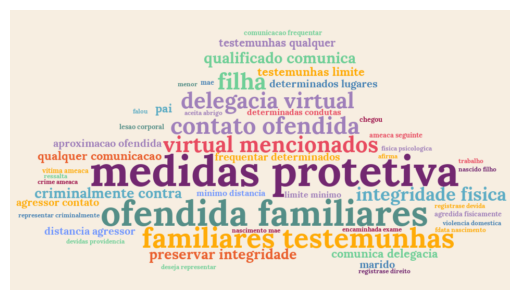

In [22]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    custom_palette= ['#9c0f48','#6FCF97','#722770','#ea5f2d','#6f95ff','#ffab07','#9F7FBA','#548e87', '#5cacc4','#e84a5f', '#4682B4']
    return np.random.choice(custom_palette)

mascara = np.array(Image.open('C:\\Users\\carlo\\Downloads\\nuvem1.jpg'))

wordcloud = WordCloud(stopwords=stop_words, 
                      max_words=50, 
                      width=750, 
                      height=500, 
                      background_color='#f7eee1', 
                      mask=mascara,
                      prefer_horizontal=1.0,
                      font_path="C:\\Users\\carlo\\Downloads\\lora\\Lora-Bold.ttf",
                      color_func=custom_color_func).generate(text_filtered)

# Mostrar a nuvem de palavras
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

with open("mineração_texto/nuvem_palavras_relatos.svg", "w") as f:
    f.write(wordcloud.to_svg())

#### Modelo de Latent Dirichlet Allocation (LDA) com a biblioteca gesim para realizar modelagem de tópicos no conjunto de relatos.

In [44]:
import scipy

In [45]:
import gensim

ImportError: cannot import name 'triu' from 'scipy.linalg' (c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\linalg\__init__.py)

In [ ]:
dictionary = corpora.Dictionary(tokenized_reports)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reports]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

### Pré-processamento para aplicação do algoritimo LDA

* Processo de vetorização

In [15]:
tf_vectorizer = CountVectorizer(
    min_df=5,           # Considera palavras que aparecem em pelo menos 5 documentos
    max_df=0.5,          # Exclui termos que aparecem em mais de 50% dos documentos
    max_features=50000,  # Limita o número de termos no vocabulário aos 50.000 mais frequentes
    stop_words=stop_words, # Remove palavras comuns que não são úteis
    ngram_range=(1, 1)   # Considera uni-gramas (termos únicos) e bi-gramas (pares de termos)
)

#Transformação
vec_text = tf_vectorizer.fit_transform(relatos_limpos)

#Retorna a lista de palavras
words = tf_vectorizer.get_feature_names_out()

print(vec_text.shape)
print(len(words))

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nascimento', 'volume'] not in stop_words.
  warnings.warn(


(47607, 23910)
23910


In [16]:
words[0:20]

array(['aaproximacao', 'aaproximao', 'aas', 'abaetetubapa', 'abairro',
       'abaixase', 'abala', 'abalada', 'abaladaque', 'abaladas',
       'abalado', 'abalados', 'abalando', 'abalar', 'abalda', 'abalo',
       'abalos', 'abalou', 'abandona', 'abandonada'], dtype=object)

### Implementação do LDA

#### Encontrar os tópicos

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

In [18]:
def print_top_words(model, feature_names, n_top_words):
  #Essa função imprime as palavras mais importantes para cada tópico descoberto pelo modelo LDA.
  for topic_idx, topic in enumerate(model.components_):
    print("\n--\nTopic #{}: ".format(topic_idx + 1))
    message = ", ".join([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()

def display_topics(W, H, feature_names, relatos, no_top_words, no_top_documents):
    #Essa função exibe os tópicos e os documentos mais representativos para cada tópico.
    for topic_idx, topic in enumerate(H):
        print("\n--\nTopic #{}: ".format(topic_idx + 1))
        print(", ".join([feature_names[i]
                for i in topic.argsort()[:-no_top_words - 1:-1]]).upper())
        top_d_idx = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for d in top_d_idx:
            print('Relato índice {} : \t{:.2f}'.format(d, W[d, topic_idx]))

#### Modelo de Latent Dirichlet Allocation (LDA) com a biblioteca scikit-learn para realizar modelagem de tópicos no conjunto de relatos representados por vetores de contagem de palavras.

In [19]:
lda = LatentDirichletAllocation(n_components=20, 
                                learning_method='batch', # 'online' equivale a minibatch no k-means
                                random_state=0)

t0 = time()

lda.fit(vec_text)
doc_topic_matrix = lda.transform(vec_text) #Converte os documentos representados pelos vetores vec_text em distribuições de tópicos, onde cada linha da matriz resultante (doc_topic_matrix) representa um documento e cada coluna representa a probabilidade do documento pertencer a um determinado tópico.

print("done in %0.3fs." % (time() - t0))

done in 1214.705s.


* Palavras mais associadas com cada tópico

In [20]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)


Topics in LDA model:

--
Topic #1: 
ofendida, agressor, contato, proibio, testemunhas, companheiro, qualquer, frequentar, familiares, solicita

--
Topic #2: 
ofendida, filho, residencia, familiares, testemunhas, protetivas, oferecido, especializada, contato, seguintes

--
Topic #3: 
vtima, providncias, residncia, ameaa, contra, ameaas, processo, polcia, ameaada, imvel

--
Topic #4: 
fisicamente, agredida, corporal, rosto, agrediu, socos, leso, exame, encaminhada, corpo

--
Topic #5: 
valor, trabalho, dinheiro, empresa, reais, pagar, loja, falou, numero, contato

--
Topic #6: 
ofendida, familiares, testemunhas, agressor, contato, protetivas, fisica, filho, aproximacao, distancia

--
Topic #7: 
adolescente, filha, sexual, crianca, especializada, menor, exame, vitima, nascida, genitora

--
Topic #8: 
vitima, ameaca, ameacas, mae, residencia, providencias, irma, ameacada, cidada, filha

--
Topic #9: 
imovel, apartamento, ronaldo, max, jessica, filha, sair, michel, renan, junior

--
Topic 

* Documentos mais associados a cada topico

In [21]:
display_topics(doc_topic_matrix, lda.components_, tf_feature_names, relatos, 10, 10)


--
Topic #1: 
OFENDIDA, AGRESSOR, CONTATO, PROIBIO, TESTEMUNHAS, COMPANHEIRO, QUALQUER, FREQUENTAR, FAMILIARES, SOLICITA
Relato índice 9283 : 	0.99
Relato índice 3412 : 	0.99
Relato índice 3047 : 	0.99
Relato índice 14589 : 	0.99
Relato índice 4876 : 	0.99
Relato índice 17214 : 	0.99
Relato índice 13779 : 	0.99
Relato índice 14582 : 	0.99
Relato índice 13013 : 	0.99
Relato índice 7895 : 	0.99

--
Topic #2: 
OFENDIDA, FILHO, RESIDENCIA, FAMILIARES, TESTEMUNHAS, PROTETIVAS, OFERECIDO, ESPECIALIZADA, CONTATO, SEGUINTES
Relato índice 33645 : 	1.00
Relato índice 35109 : 	0.99
Relato índice 47409 : 	0.99
Relato índice 37431 : 	0.99
Relato índice 33259 : 	0.99
Relato índice 28276 : 	0.99
Relato índice 45064 : 	0.99
Relato índice 36240 : 	0.99
Relato índice 29940 : 	0.99
Relato índice 41992 : 	0.99

--
Topic #3: 
VTIMA, PROVIDNCIAS, RESIDNCIA, AMEAA, CONTRA, AMEAAS, PROCESSO, POLCIA, AMEAADA, IMVEL
Relato índice 7287 : 	0.98
Relato índice 7288 : 	0.98
Relato índice 7076 : 	0.98
Relato índice 

In [22]:
print('Matriz documento-tópicos:' + str(doc_topic_matrix.shape))
print('Matriz tópicos-termos:' + str(lda.components_.shape))

Matriz documento-tópicos:(47607, 20)
Matriz tópicos-termos:(20, 23910)


* Atribuir um tópico principal a cada documento com base nas distribuições de tópicos obtidas do modelo LDA.

In [23]:
main_topic = []
mt_prob = []
for l in range(len(relatos['relato'])):
  main_topic.append(doc_topic_matrix[l, :].argmax() + 1)
  mt_prob.append(doc_topic_matrix[l, :].max())

relatos = relatos.assign(main_topic=main_topic, main_topic_prob=mt_prob)


In [24]:
topico = 1
pd.options.display.max_colwidth = 300
relatos[relatos['main_topic'] == topico].sort_values('main_topic_prob', ascending = False)[['main_topic_prob','relato']].head(20).sample(10)

,main_topic_prob,relato
9283,0.991667,doze vive senhor mrcio pinto filho socorro contato n fundamental incompleto pedreiro residentes visconde inhama n chaco curuzu pedreirabelm filhos relao exps relacionamento frequentes ofensas morais parte companheiro presente h companheiro sob efeitos bebida alcolica logo deu incio discusso prof...
17345,0.988690,veio denunciar ex marido jos ribamar miranda filho oscarina rodrigues possui contato telefnio fundamental incompleto madeireiro endereo jorge principal benedito h residncia deu incio discusso danificou trs aparelhos celulares propriedade lg k preta samsung azul gs cinza notas fiscais levar mos p...
4876,0.990206,veio denunciar ex companheiro charles jos siva rebelo sena filho cemira rebelo sena mdio completo desempregado contato n imvel propriedade casal andrade igreja cristo brasil cabanagem h residncia encontrou ex companheiro nesse discusso casal ex companheiro empurrou arrastou parede joou direo che...
7895,0.989894,veio denunciar ex companheiro devison braga filho elza braga contato n canides n alecrimnatal ex companheiro belm ficar residncia d genitora miranda perto ponte tucunduba viveu maritalmente quatro relao possuem dois filhos quatro dois h ex companheiro enviou whatsaap seguintes safada galinha pod...
17884,0.988953,viveu maritalmente vinte senhor jos paixo oliveira filho benedita paixo oliveira contato n residentes imvel propriedade casal conjunto paraso pssaros travessa sabi quadra maracangalha h atender ex companheiro nesse empurrou contra parede veio bater mo esquerda deixou marcas aparentes seguida dir...
3047,0.990865,veio denunciar irmo humberto jos cordeiro pina contato n residentes pais avenida nazar n bloco b ap quintino generalssimo deodoro nazar relacionamento irmo conflituoso devido usurio droga ilcita h discusso ofendida moralmente irmo chamou vagabunda puta seguida agresso fsica empurro cair machucou...
401,0.989326,veio denunciar ex companheiro antnio pamplona barbosa filho lcia pamplona barbosa fundamental incompleto pedreiro contato n endereo antnio everdosa nafrente humait vileta pedreira reside imveis propriedade familiares ex companheiro h ex companheiro casal morava pegou bolsa tirou rasgou passagens...
3412,0.991204,viveu maritalmente trs senhor bruno saraiva cardoso filho suely saraiva cardoso contato n nova alameda arirambamosqueiro dessa relao possuem filha ano seis meses dois separados porm ex companheiro aceita perturba ligaes frequentes respeitar horrio residncia usando visita filha casal tirar sosseg...
13779,0.990104,viveu maritalmente oito senhor edmilson pereira rgpcpa filiao edivaldo freitas eliete matos pereira fundamental incompleto servios gerais possui contato telefnico endereo travessa luis bentes canal galo curuo telgrafo h ex companheiro residncia sob efeitos bebida alcolica deu incio discusso puta...
14582,0.990000,casada separada senhor raimundo melo possui contato telefnico propriedade artur bernardes jos fundos atrs centro sade pratinhaicoaraci devido conflitos familiares morar aluguel enquanto marido permaneceu l xinga faz ameaas h residncia encontrou marido deu incio discusso chamou galinha puta pegou...


* Tópicos por documento

In [25]:
# Nomes das colunas dos tópicos
topicnames = ["Topic {}".format(i + 1) for i in range(doc_topic_matrix.shape[1])]

# Criar DataFrame relato_topico
relato_topico = pd.DataFrame(np.round(doc_topic_matrix, 2), columns=topicnames, index=relatos.index)

# Adicionar o índice do relato ao DataFrame relato_topico
relato_topico['Relato_Index'] = relatos.index

# Reorganizar as colunas
ordem = ['Relato_Index']
ordem.extend(topicnames)
relato_topico = relato_topico[ordem]

# Visualizar o DataFrame relato_topico
relato_topico.head()



,Relato_Index,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.1,0.17,...,0.0,0.00,0.0,0.0,0.00,0.09,0.23,0.00,0.0,0.40
1,1,0.0,0.07,0.21,0.36,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.11,0.25,0.0,0.00
2,2,0.3,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.44,0.0,0.0,0.00,0.00,0.25,0.00,0.0,0.00
3,3,0.0,0.00,0.23,0.05,0.0,0.0,0.0,0.0,0.00,...,0.0,0.20,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
4,4,0.0,0.00,0.45,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.26,0.0,0.0,0.05,0.00,0.00,0.00,0.0,0.22


### Visualizações

In [28]:
import pyLDAvis.gensim


In [26]:
import pyLDAvis
from pyLDAvis import lda_model

pyLDAvis.enable_notebook()

* Função prepare para preparar os dados para visualização de tópicos utilizando o modelo LDA.

In [27]:
pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds = 'tsne', R=20)

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      44.408211   0.523915       1        1   5.251608
1      14.101037 -37.433300       2        1   3.360375
2       0.865190  36.863422       3        1   4.131194
3     -14.736777 -35.266350       4        1   6.490568
4      69.830818  18.145504       5        1   6.291309
5     -43.805111  13.900719       6        1  10.541185
6     -20.311552  60.495480       7        1   3.305449
7      -9.699882  13.255656       8        1   4.863411
8      22.622952  -9.747298       9        1   2.255746
9      67.514725 -13.683497      10        1   4.855957
10     42.095894 -31.128925      11        1   3.275675
11      7.948655  65.608231      12        1   6.795708
12     -1.092470  -9.954212      13        1   4.986717
13     59.106899  46.487080      14        1   5.983784
14     16.590063  15.175373      15        1   1.906005
15     37.689240  67.620056      16        1   2.763365
16    -26.519068  34.255302      17        1   5.678933
17    -28.795113  -9.628156      18        1   4.584766
18     41.273083  24.599333      19        1   7.828459
19     25.208462  42.610699      20        1   4.849786, topic_info=                Term          Freq         Total Category  logprob  loglift
16440       ofendida  25019.000000  25019.000000  Default  20.0000  20.0000
828         agressor  14477.000000  14477.000000  Default  19.0000  19.0000
22165    testemunhas  12998.000000  12998.000000  Default  18.0000  18.0000
23552         vitima  23211.000000  23211.000000  Default  17.0000  17.0000
5479         contato  14519.000000  14519.000000  Default  16.0000  16.0000
...              ...           ...           ...      ...      ...      ...
14623          meses    785.450470   7429.293248  Topic20  -5.3778   0.7793
16830            pai    714.079389   6134.342363  Topic20  -5.4731   0.8756
7876         durante    661.270204   4869.025559  Topic20  -5.5499   1.0297
8927   especializada    772.548163  13331.394875  Topic20  -5.3944   0.1781
22453       trabalho    623.187752   7105.937550  Topic20  -5.6092   0.5924

[1111 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
32         4  0.933436       abdmen
91        20  0.959801       abraou
101        2  0.655898  abrigamento
101        6  0.087066  abrigamento
101       12  0.071588  abrigamento
...      ...       ...          ...
23863     10  0.015802          yan
23863     18  0.086913          yan
23863     19  0.805918          yan
23881     13  0.971374       zaqueu
23891     20  0.944832      zenildo

[6105 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [46]:
corpus = [dictionary.doc2bow(words) for word in words]  # Certifique-se de ajustar 'texts' conforme necessário

# Gerar a visualização com pyLDAvis.gensim.prepare
vis_data = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)

# Salvar a visualização em um arquivo HTML
pyLDAvis.save_html(vis_data, 'lda.html')

TypeError: prepare() missing 2 required positional arguments: 'corpus' and 'dictionary'

* Transformando os dados para um espaço bidimensional, que pode ser utilizado para visualizações adicionais.

In [28]:
from sklearn.manifold import TSNE

relatos_embedded = TSNE(n_components=2, verbose=1, perplexity=40, early_exaggeration=20).fit_transform(doc_topic_matrix)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 47607 samples in 0.020s...
[t-SNE] Computed neighbors for 47607 samples in 26.769s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47607
[t-SNE] Computed conditional probabilities for sample 2000 / 47607
[t-SNE] Computed conditional probabilities for sample 3000 / 47607
[t-SNE] Computed conditional probabilities for sample 4000 / 47607
[t-SNE] Computed conditional probabilities for sample 5000 / 47607
[t-SNE] Computed conditional probabilities for sample 6000 / 47607
[t-SNE] Computed conditional probabilities for sample 7000 / 47607
[t-SNE] Computed conditional probabilities for sample 8000 / 47607
[t-SNE] Computed conditional probabilities for sample 9000 / 47607
[t-SNE] Computed conditional probabilities for sample 10000 / 47607
[t-SNE] Computed conditional probabilities for sample 11000 / 47607
[t-SNE] Computed conditional probabilities for sample 12000 / 47607
[t-SNE] Computed conditional probabilities for s

In [29]:
relatos = relatos.assign(tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos.sample(500)).mark_circle(
    opacity = .7,
    size = 30
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color = 'main_topic:N',
    size = 'main_topic_prob',
    tooltip = ['relato', 'main_topic', 'main_topic_prob']
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)

* Agrupamento de acordo com os topicos

 Utilização do algoritmo MiniBatchKMeans para realizar clustering nos dados de tópicos obtidos a partir da matriz dos relatos transformados.

In [30]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=11, init_size=1024, batch_size=2048, random_state=20)
#fit the data 
kmeans.fit(doc_topic_matrix)
labels = kmeans.predict(doc_topic_matrix)

In [31]:
relatos1 = relato_topico.assign(grupo = labels, 
                              tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos1.sample(500)).mark_circle(
    opacity = .7,
    size = 50
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color = 'grupo:N',
    tooltip = [str(c) for c in relatos1.columns]
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)